# Fake News Detection Using Python
![image](https://www.interviewbit.com/blog/wp-content/uploads/2021/09/Fake-News-Detection.jpg)

### Introduction

[Fake news](https://en.wikipedia.org/wiki/Fake_news) is the intentional broadcasting of false or misleading claims as news, where the statements are purposely deceitful.

Newspapers, tabloids, and magazines have been supplanted by digital news platforms, blogs, social media feeds, and a plethora of mobile news applications. News organizations benefitted from the increased use of social media and mobile platforms by providing subscribers with up-to-the-minute information.

Consumers now have instant access to the latest news. These digital media platforms have increased in prominence due to their easy connectedness to the rest of the world and allow users to discuss and share ideas and debate topics such as democracy, education, health, research, and history. Fake news items on digital platforms are getting more popular and are used for profit, such as political and financial gain.


#### The main goal for this tutorial is:

To build a model to accurately classify a piece of news as REAL or FAKE.

### Dataset

This [dataset](https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view) has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE. The dataset takes up 29.2MB of space.


### Import libraries

In [1]:
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#Itertools is a module in Python, it is used to iterate over data structures that can be stepped over using a for-loop
import itertools
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
#The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
#Passive Aggressive algorithms are online learning algorithms, Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.
from sklearn.linear_model import PassiveAggressiveClassifier
#The accuracy score and the confusion matrix tell us how well our model fares.
from sklearn.metrics import accuracy_score, confusion_matrix

### Load the dataframe

In [2]:
#Read the datat
data = pd.read_csv('news.csv')

#display the first 5 row & colume
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Get shape (the size of dataset)
print("Shape of News data:", data.shape)
print("News data columns", data.columns)

Shape of News data: (6335, 4)
News data columns Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [4]:
# renaming the columns
data.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [5]:
data.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# make sure there is no null in data
data.isnull()

,id,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


FAKE: Unreliable
REAL: Reliable
Distribution of labels:
REAL    3171
FAKE    3164
Name: label, dtype: int64


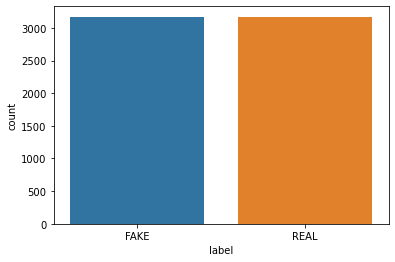

In [7]:
#Counting plots for both labels
sns.countplot(x="label", data=data)
print("FAKE: Unreliable")
print("REAL: Reliable")
print("Distribution of labels:")
print(data.label.value_counts());

### Part One:


1. Using TfidfVectorizer to convert a collection of raw documents into a matrix of TF-IDF features.
2. Using Passive Aggressive algorithms (online learning algorithms) for the purpose is to make updates that correct the loss.
3. Build confusion matrix.

In [8]:
#Get the labels from the DataFrame.
labels = data.label

In [9]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [10]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (5068,) (5068,)
Test set: (1267,) (1267,)


In [11]:
# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train = vectorizer.fit_transform(x_train) 
tfidf_test = vectorizer.transform(x_test)

In [12]:
# Initialize a PassiveAggressiveClassifier
Passive = PassiveAggressiveClassifier(max_iter=50)
Passive.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred = Passive.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.05%


In [13]:
#Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

[Text(0, 0.5, 'FAKE'), Text(0, 1.5, 'REAL')]

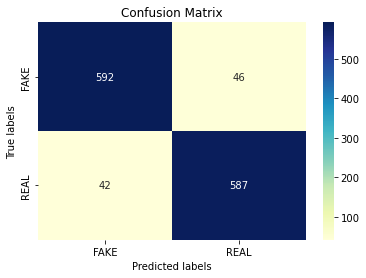

In [24]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='YlGnBu')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['FAKE','REAL'])
ax.yaxis.set_ticklabels(['FAKE','REAL'])

### Part Two:
Using Natural language processing for display the reveal structure and meaning of text.

In [15]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\athari\anaconda3\python.exe -m pip install --upgrade pip' command.


The [WordCloud](https://github.com/amueller/word_cloud) library's <code> wordcloud()</code> function will be used, and the <code>generate()</code> is utilized for generating the word cloud image:

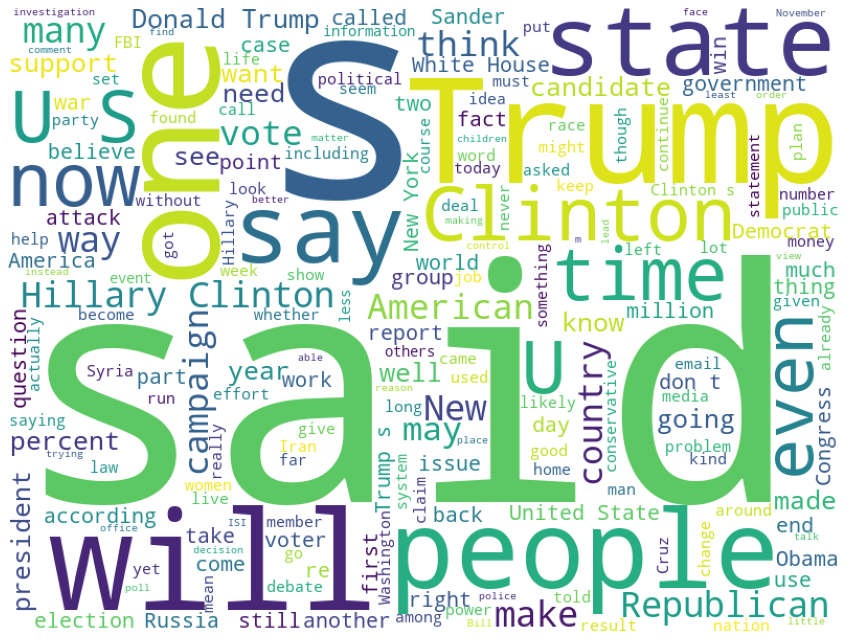

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(data['text']))
# plotting the word cloud
plt.figure(figsize=(15,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

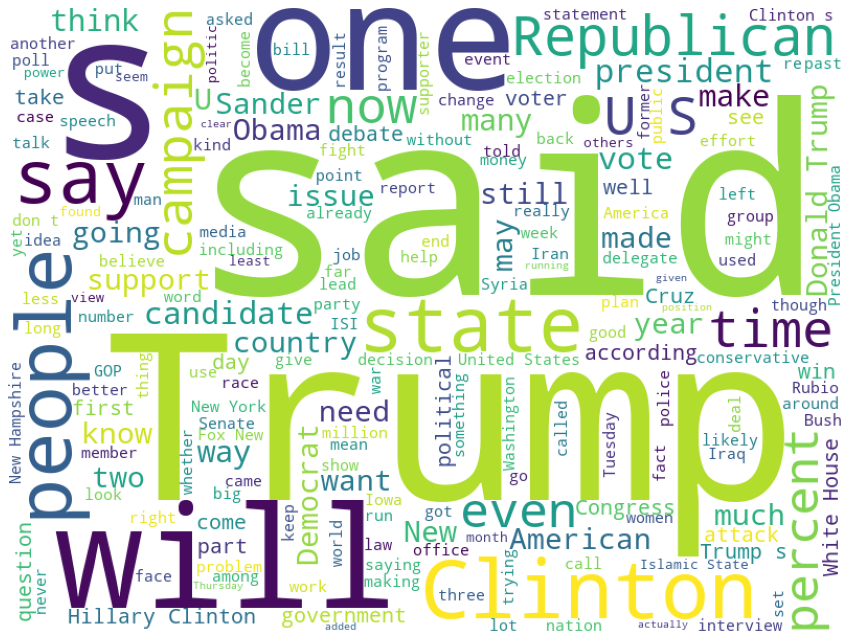

In [17]:
true_n = ' '.join(data[data['label']=="REAL"]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(15,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

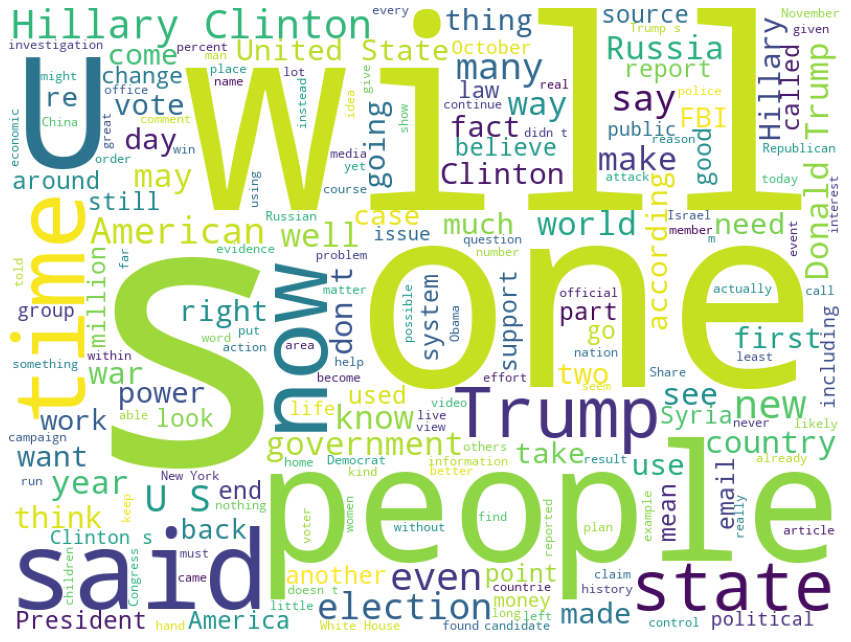

In [18]:
fales_n = ' '.join(data[data['label']=="FAKE"]['text']) 
wc = wordcloud.generate(fales_n)
plt.figure(figsize=(15,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

Ref:
1. https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/
2. https://www.thepythoncode.com/article/fake-news-classification-in-python   